### Data Cleaning and Preparation

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import matplotlib.image as mpimg
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df = pd.read_csv('D:\zerotopandas\Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [4]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [5]:
df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [7]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [8]:
## Impute the missing values in profession column with its mode
df['Profession'] = df['Profession'].fillna(df['Profession'].mode())
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [9]:
df.describe()
# Age and Annual income data is a little bit weird as Age should not be zero and the same as Annual Income

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


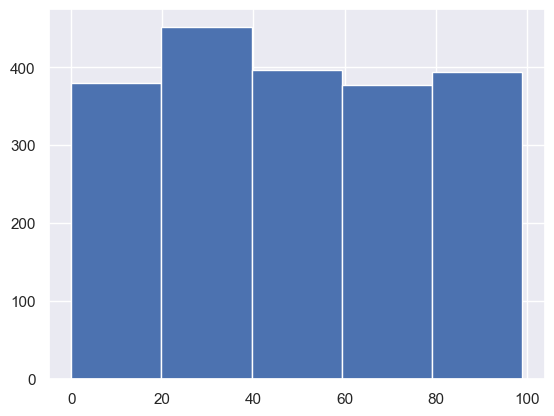

In [10]:
# Checking Age data
plt.hist(df.Age , bins = 5);
# It seems that the data set includes the observations with age less than 14 which is less than the minimum age for employment in USA
# Thus the observations which have age less than 14 will be filtered out

In [11]:
df = df[df['Age'] >= 14]
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [12]:
## Checking Annual Income values
df.sort_values('Annual Income ($)' , ascending = True)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
246,247,Male,23,0,96,Doctor,1,3
169,170,Male,32,0,63,Artist,2,2
272,273,Female,96,1000,76,Entertainment,0,3
96,97,Female,47,2000,47,Artist,0,1
113,114,Male,19,2000,46,Artist,1,1
...,...,...,...,...,...,...,...,...
1801,1802,Male,20,189650,60,Lawyer,8,4
638,639,Female,59,189672,8,Doctor,0,7
1576,1577,Female,16,189689,37,Healthcare,8,5
1257,1258,Male,60,189945,20,Engineer,0,5


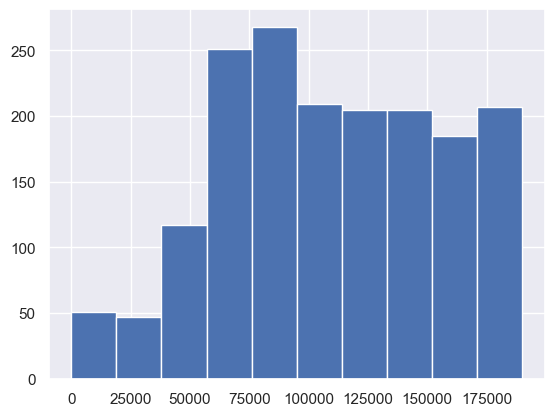

In [13]:
## Checking Annual Income Data distribution
plt.hist(df['Annual Income ($)']);

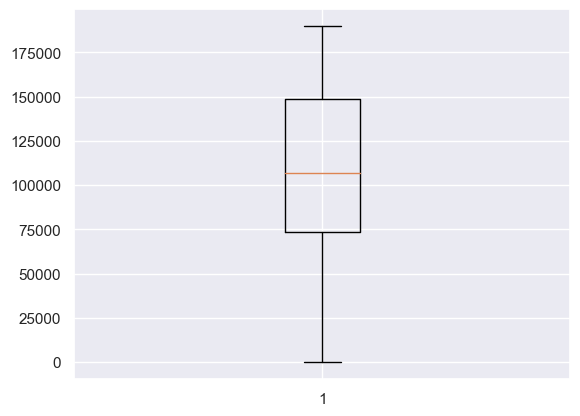

In [14]:
## Checking for outliers
plt.boxplot(data = df , x = 'Annual Income ($)');

In [15]:
## Filter the data point with annual income zero
df = df[df['Annual Income ($)'] > 0]
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [16]:
## Filter the row ith work experience is zero
df = df[df['Work Experience'] > 0]
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
4,5,Female,31,38000,40,Entertainment,2,6
6,7,Female,35,31000,6,Healthcare,1,3
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [17]:
# Make a copy
df1 = df.copy()

### Start Exploring Data

In [18]:
df1

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
4,5,Female,31,38000,40,Entertainment,2,6
6,7,Female,35,31000,6,Healthcare,1,3
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [19]:
df1.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

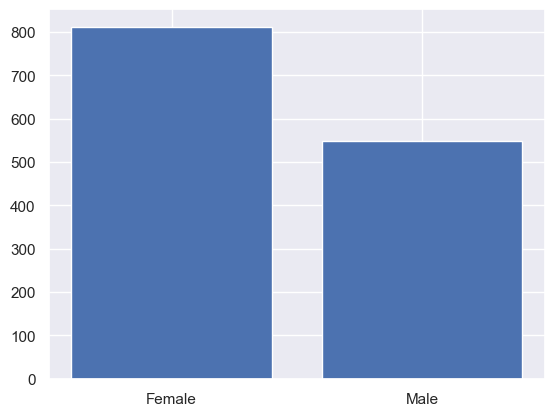

In [20]:
# Inspecting Gender of observations
df_gender = pd.DataFrame(df1.groupby('Gender').count()['CustomerID'].sort_values(ascending = False))
df_gender = df_gender.reset_index()
df_gender
plt.bar(df_gender['Gender'] , df_gender['CustomerID'])
plt.show()

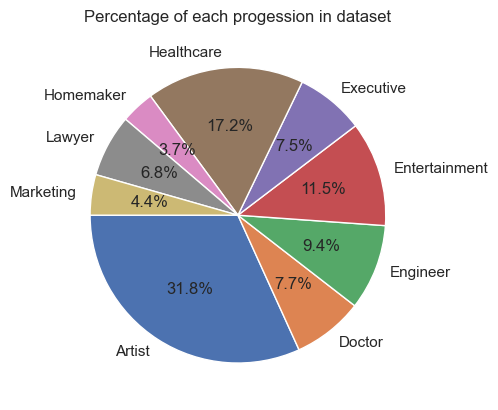

In [21]:
#Count each profession
df_pie = df1.groupby('Profession').count()[['CustomerID']].reset_index()
df_pie = df_pie.rename(columns = { 'CustomerID' : 'Total'})

# plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);
plt.pie(df_pie.Total, labels = df_pie.Profession , data = df_pie , autopct='%1.1f%%', startangle=180)
plt.title('Percentage of each progession in dataset')
plt.show()

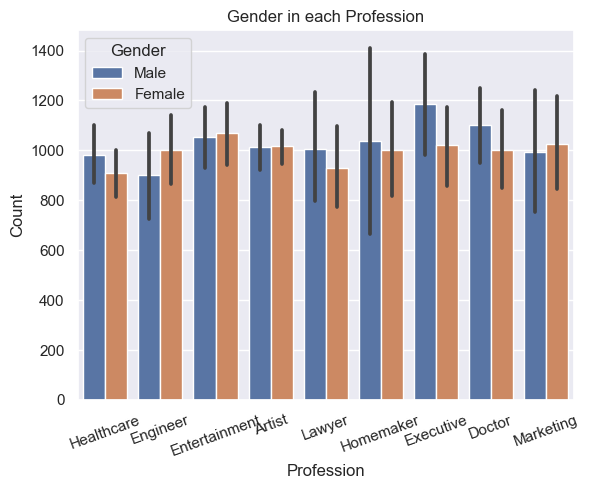

In [22]:
# Inspecting Gender in each profession
sns.barplot(x = 'Profession' , y = 'CustomerID' ,hue = 'Gender', data = df1)
plt.xticks( rotation = 20)
plt.title('Gender in each Profession')
plt.ylabel('Count');

C:\Users\kendo\AppData\Local\Temp\ipykernel_1292\3529778806.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_profession = df1.groupby('Profession').mean()[['Spending Score (1-100)']]


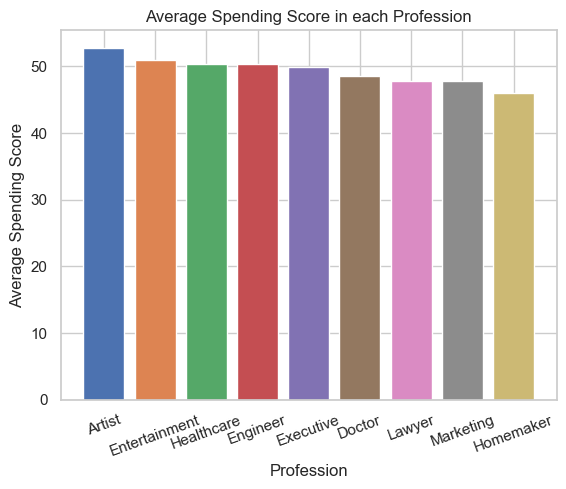

In [23]:
## Inspect the average spending score for each profession
df_mean_profession = df1.groupby('Profession').mean()[['Spending Score (1-100)']]
df_mean_profession = df_mean_profession.reset_index()
df_mean_profession = df_mean_profession.sort_values('Spending Score (1-100)' , ascending = False)

#Set color and style
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
sns.set_style('whitegrid')

plt.bar(df_mean_profession['Profession'],df_mean_profession['Spending Score (1-100)'] , color = colors)
plt.title('Average Spending Score in each Profession')
plt.xlabel('Profession')
plt.ylabel('Average Spending Score')
plt.xticks(df_mean_profession['Profession'] , rotation = 20)
plt.show()

C:\Users\kendo\AppData\Local\Temp\ipykernel_1292\3135128867.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_family = df1.groupby('Family Size').mean()[['Spending Score (1-100)']].reset_index()


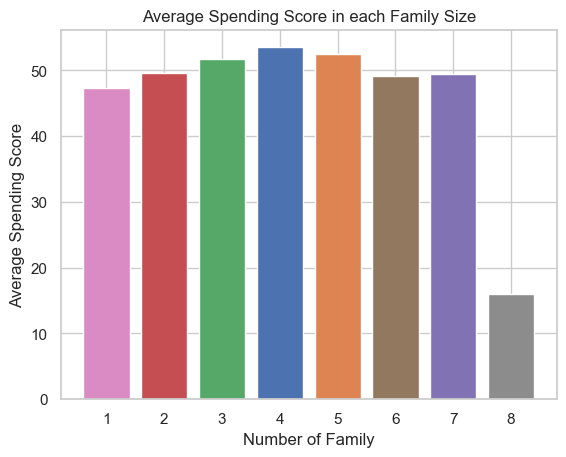

In [24]:
# Average spending score by family size
df_family = df1.groupby('Family Size').mean()[['Spending Score (1-100)']].reset_index()
df_family = df_family.sort_values('Spending Score (1-100)' , ascending = False)

plt.bar(df_family['Family Size'],df_family['Spending Score (1-100)'] , color = colors)
plt.title('Average Spending Score in each Family Size')
plt.xlabel('Number of Family')
plt.ylabel('Average Spending Score')
plt.show()

C:\Users\kendo\AppData\Local\Temp\ipykernel_1292\2983259883.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(labels = ['Healthcare', 'Engineer', 'Entertainment', 'Artist', 'Lawyer',
C:\Users\kendo\AppData\Local\Temp\ipykernel_1292\2983259883.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pie1 = df1.groupby('Profession').sum()[['Spending Score (1-100)']]


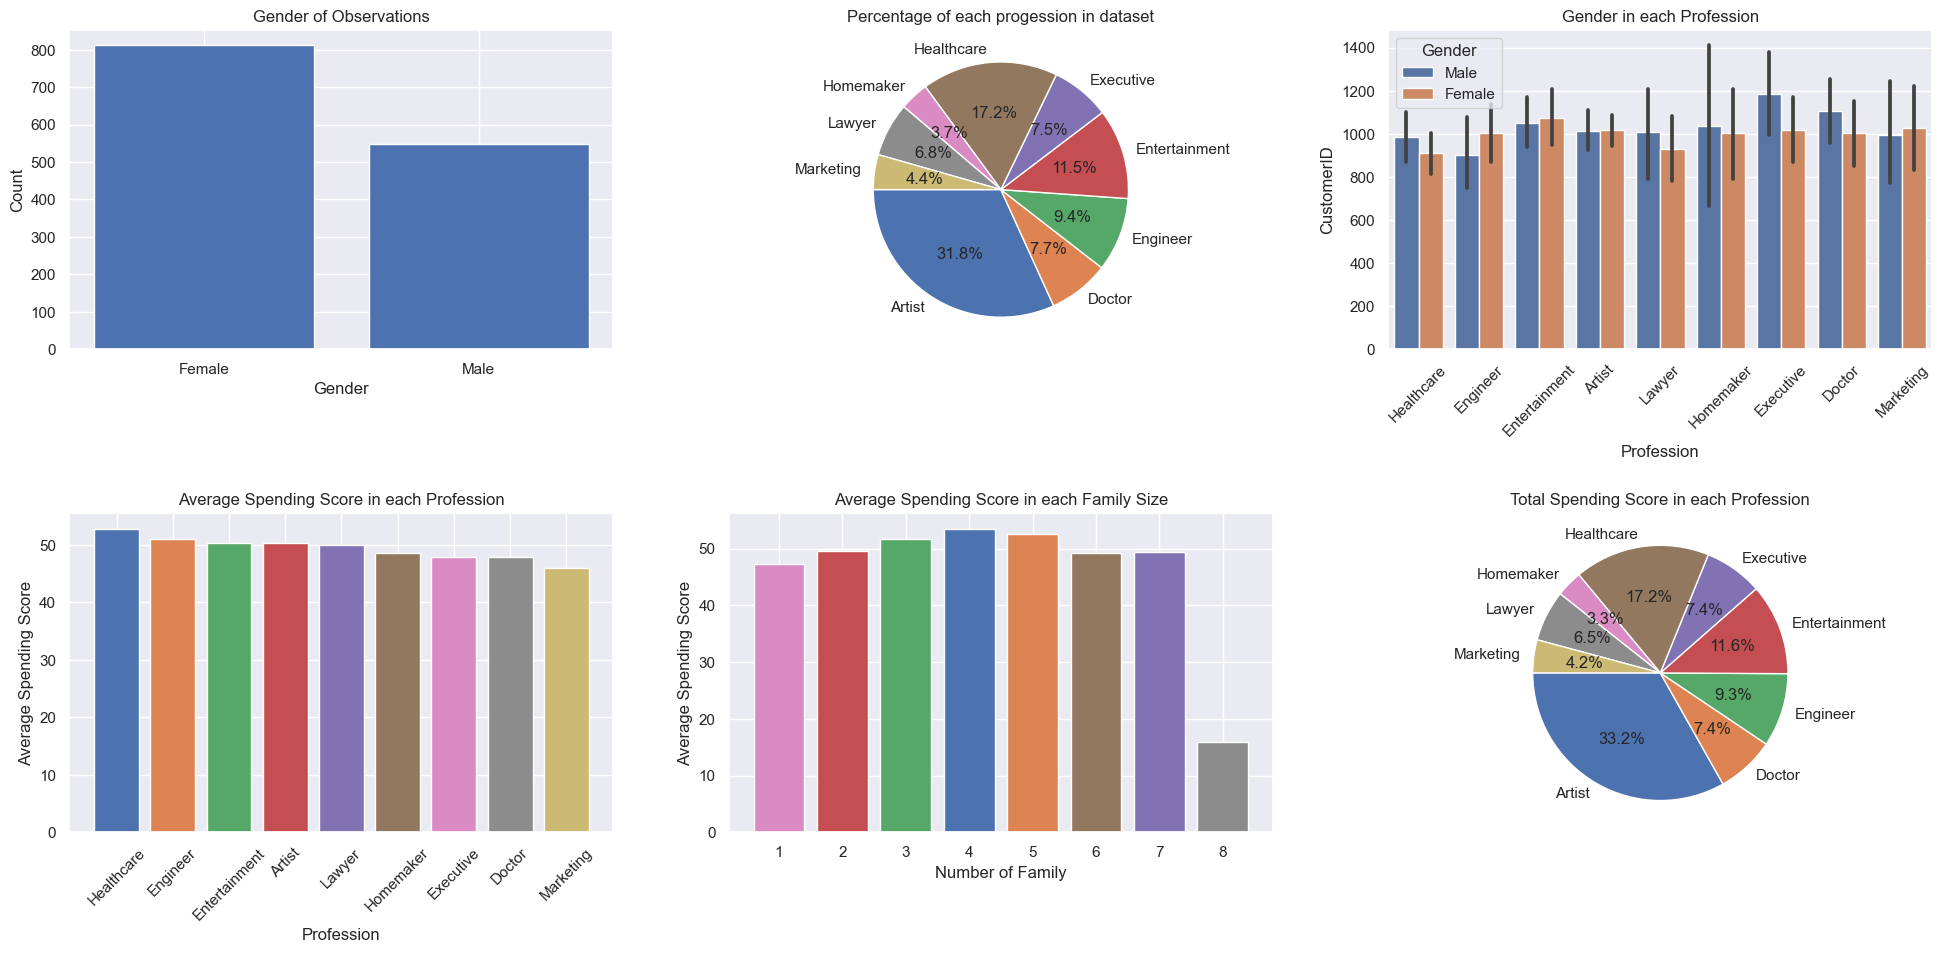

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

axes[0,0].bar(df_gender['Gender'] , df_gender['CustomerID'])
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Gender of Observations')

axes[0,1].pie(df_pie.Total, labels = df_pie.Profession , data = df_pie , autopct='%1.1f%%', startangle=180)
axes[0,1].set_title('Percentage of each progession in dataset')


axes[0,2].set_title('Gender in each Profession')
sns.barplot(x = 'Profession' , y = 'CustomerID' ,hue = 'Gender', data = df1 , ax = axes[0,2])
axes[0,2].set_xticklabels(labels = ['Healthcare', 'Engineer', 'Entertainment', 'Artist', 'Lawyer',
       'Homemaker', 'Executive', 'Doctor', 'Marketing'] , rotation=45)


axes[1,0].bar(df_mean_profession['Profession'],df_mean_profession['Spending Score (1-100)'] , color = colors)
axes[1,0].set_title('Average Spending Score in each Profession')
axes[1,0].set_xlabel('Profession')
axes[1,0].set_ylabel('Average Spending Score')
axes[1,0].set_xticklabels(labels = ['Healthcare', 'Engineer', 'Entertainment', 'Artist', 'Lawyer',
       'Homemaker', 'Executive', 'Doctor', 'Marketing'] , rotation=45)


axes[1,1].bar(df_family['Family Size'],df_family['Spending Score (1-100)'] , color = colors)
axes[1,1].set_title('Average Spending Score in each Family Size')
axes[1,1].set_xlabel('Number of Family')
axes[1,1].set_ylabel('Average Spending Score')

df1
df_pie1 = df1.groupby('Profession').sum()[['Spending Score (1-100)']]
axes[1,2].pie(df_pie1['Spending Score (1-100)'] , data = df_pie1 , labels = df_pie1.index, autopct='%1.1f%%', startangle=180)
axes[1,2].set_title('Total Spending Score in each Profession')

plt.tight_layout(pad=2);

# Conclusion
## The findings show that most of the participants in the survey are female and work as an artist. The highest number of female customer is in entertainment profession while male is in executive profession.
## Although customerswith artist profession has the highest total spending score and are accounted for the highest profession among others, the top three highest spending score in each profession are Healthcare , Engineer, and Entertainment , respectively.
## Hypothetically, the bigger the family size the higher average spending score. However, the family size with four, five, and six are the higest top three average spending score, respectively.